# EAE 130A 
# Professor Harvey
# Assignment 3
## Author: Jordan Naumburg
## COAuthor: 
## Last revised: February 8th 2023

## Procedure/Objective
## 1)Performa a first order drag build up and determine aerodynamic parameters
## 2)Identify each key constraint based on customer objectives
## 3)Identify all required values that allow you to transform the constraint equations to be specifically a function of power loading (W/P) and wing loadingf (W/S)
## 4)Create a custom code that plots each constraint with wing loading on the x-axis and power loading on the y-axis


In [1]:
# Import needed modules for program
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 2. Requirements and Regulations 


# 2.1 Takeoff Field Length
Recall $TOP = BFL/37.5$ and $$ \frac{T}{W} = \frac{W/S}{(\rho/\rho_{SL})C_{L_{max}}TOP}$$
Given an educated guess of a field length, obtain $\frac{T}{W}$ w.r.t. $\frac{W}{S}$.

# 2.2 Landing Field Length 
Recall $$ \frac{W}{S} = \frac{(\rho / \rho_{SL})C_{L_{max}}}{80*0.65} (S_{land}-S_a) $$
where
- $\frac{\rho}{\rho_{SL}} \approx 0.95$ 
- $s_{land} = BFL * 0.6$ to comply with FAR requirements
- $s_a = 1000 ft$
- $0.65$ is the maximum landing to takeoff weight ratio

Calculate $\frac{W}{S}$ w.r.t. $C_{L_{max}}$.

# 2.3 CLimb
Recall $$\frac{T}{W} = (\frac{1}{0.8})(\frac{N_{engines}}{N_{engines}-1})(\frac{k_s^2}{C_{L_{max}}}C_{D_0} + \frac{C_{L_{max}}}{k_s^2 \pi e AR} + G)$$

There are many different climbing segments (takeoff, transition segment, second segment, enroute, etc). For takeoff climb, the following hold:
- $k_s = 1.2$
- $C_{L_{max}} = 2.2$
- $G = 0.012$

Calculate $\frac{T}{W}$.

# 2.4 Cruise
Recall $$ \frac{T}{W} = \frac{qC_{D_0}}{W/S} + \frac{W}{S}(\frac{1}{q\pi A Re}) $$

Assume that our hybrid aircraft cruises at 40,000ft, Mach 0.84. Then $q = 228.8 lbf/ft^2$. Accounting for the thrust lapse at altitude $\frac{T}{W}_{SL} = \frac{\rho}{\rho_{SL}}^{-0.6}\frac{T}{W}$, calculate $\frac{T}{W}$ w.r.t. $\frac{W}{S}$.

Calculated Landing Length: 116.25625


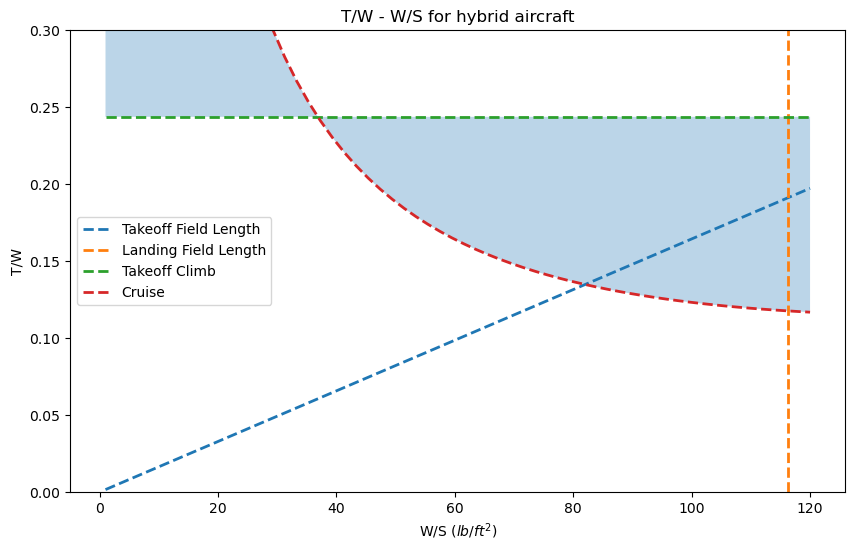

In [30]:
## for now lets assume the same variables as the TA has
## The other group need to calculate parasitic drag and CL max first before we can get the correct values


#states in the RFP that the maximum takeoff length is equal to 4,500
# over a 50' obstacle to a runawat with dry pavement
# states maximum landing field length is also 4500
# states take off, and landing performace should also be shown at 5000 above mean sea level
# Distance to climb is 200 nautical miles
# Initial cruising altitude of at least FL280

Clmax = 2.2         #we still need to calculate this
rho_rhosl = 0.95    #ratio of rho a cruise over rho at sea level
Sland = 4500        #landing distance
Sa = 50             #obstacle clearance distance

WS = ((rho_rhosl*Clmax)/(80))*(Sland - Sa) #landing field length 
print("Calculated Landing Length:", WS)

#make an array from 0 to the landing length
W_S = np.linspace(1, 120, 60)

TW = 0.001644

TW_takeoff = 0.001644*W_S
TW_landing = WS*np.ones(60)
TW_climb = 0.2437*np.ones(60)
TW_cruise = 8.4566/W_S + 0.0003865*W_S

plt.figure(figsize= (10,6))
plt.title('T/W - W/S for hybrid aircraft')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("T/W")
plt.plot(W_S, TW_takeoff, label = 'Takeoff Field Length', linestyle = "--", linewidth = 2)
plt.plot(TW_landing, np.linspace(0,1,60), label = 'Landing Field Length', linestyle = "--", linewidth = 2)
plt.plot(W_S, TW_climb, label = 'Takeoff Climb', linestyle = "--", linewidth = 2)
plt.plot(W_S, TW_cruise, label = 'Cruise', linestyle = "--", linewidth = 2)
plt.legend(loc = 'best')
plt.ylim(0,0.3)


#shade in the region between the four constraints

plt.fill_between(W_S, TW_climb, TW_cruise, TW_takeoff, alpha = 0.3)

plt.show()